# Image Classification with Scikit-Learn

In [1]:
%%html
<!DOCTYPE html>
<html lang="en">
  <head> </head>
  <body>
<script src="https://bot.voiceatlas.mysmce.com/v1/chatlas.js"></script>
<app-chatlas
	atlas-id="f759a188-f8bb-46bb-9046-3b1b961bd6aa"
	widget-background-color="#3f51b5ff"
	widget-text-color="#ffffffff"
	widget-title="Chatlas">
</app-chatlas>
  </body>
</html>

**Useful Links**

- <a href="https://www.dataquest.io/blog/sci-kit-learn-tutorial/">Scikit-learn Tutorial: Machine Learning in Python</a>
- <a href="https://debuggercafe.com/image-classification-with-mnist-dataset/">Image Classification with MNIST Dataset</a>
- <a href="https://davidburn.github.io/notebooks/mnist-numbers/MNIST%20Handwrititten%20numbers/">MNIST handwritten number identification</a>

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline
import numpy as np
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [4]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [5]:
print(f"Numpy version:        {np.__version__}")
print(f"Pandas version:       {pd.__version__}")
print(f"Seaborn version:      {sns.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Numpy version:        1.20.3
Pandas version:       1.3.4
Seaborn version:      0.11.2
Scikit-Learn version: 1.0.1


## MNIST Dataset

- The <A HREF="https://en.wikipedia.org/wiki/MNIST_database"> MNIST database</A> (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.
- The database is also widely used for training and testing in the field of machine learning.
- The dataset we will be using contains 70000 images of handwritten digits among which 10000 are reserved for testing.
- This dataset is  suitable for anyone who wants to get started with image classification using Scikit-Learn. 

### Obtain the Dataset

In [6]:
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('mnist_784', version=1)

In [7]:
print(mnist_data.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

### Features of the Dataset

In [8]:
print("Keys: ", mnist_data.keys())

Keys:  dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


**Note that the `data` and `target` already separated.**

In [9]:
print(f"Shape of Data: {mnist_data.data.shape}")

Shape of Data: (70000, 784)


In [10]:
print(f"Datatype of Data: {type(mnist_data.data)}")

Datatype of Data: <class 'pandas.core.frame.DataFrame'>


In [11]:
print(f"Shape of the Target Data: {mnist_data.target.shape}")

Shape of the Target Data: (70000,)


In [12]:
print(f"Datatype of Target Data: {type(mnist_data.target)}")

Datatype of Target Data: <class 'pandas.core.series.Series'>


In [13]:
print(f"Feature Names: {mnist_data.feature_names}")

Feature Names: ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pi

In [14]:
print(f"Url: {mnist_data.url}")

Url: https://www.openml.org/d/554


Extract the feature and target arrays:

In [15]:
np_data, np_target = mnist_data['data'], mnist_data['target']

In [16]:
print(f' Shape of data:   {np_data.shape}')
print(f' Shape of target: {np_target.shape}')

 Shape of data:   (70000, 784)
 Shape of target: (70000,)


**Checking the Data**

In [17]:
len(np.unique(np_data))

256

In [18]:
np_data.values[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [19]:
len(np.unique(np_data.values[0]))

85

**Checking the Target**

In [20]:
print(f"Datatype of the target values: {np_target.dtype}")

Datatype of the target values: category


In [21]:
np_target[0]

'5'

In [22]:
type(np_target[0])

str

Print few values:

In [23]:
print(np_target[0:5])

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


Changing the labels from string to integers:

In [24]:
np_target = np_target.astype(np.uint8)

In [25]:
print(np_target[0:5])

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: uint8


Print the number of unique labels:

In [26]:
np.unique(np_target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [35]:
np_target.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

In [36]:
np_target.value_counts().sum()

70000

In [37]:
total = np_target.value_counts().sort_values(ascending=False)
percent = (np_target.value_counts()/np_target.count()).sort_values(ascending=False)*100
percent_data = pd.concat([total, percent], axis=1, 
                         keys=['Total', 'Percent'])
percent_data

Total    Percent
1   7877  11.252857
7   7293  10.418571
3   7141  10.201429
2   6990   9.985714
9   6958   9.940000
0   6903   9.861429
6   6876   9.822857
8   6825   9.750000
4   6824   9.748571
5   6313   9.018571

<font color="blue"> 
There are 70000 numbers, each stored as an array of 784 numbers depicting the opacity of each pixel, it can be displayed by reshaping the data into a 28x28 array and plotting using matplotlib. 
</font>

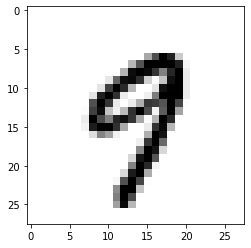

In [38]:
some_index = 15657
some_digit = np_data.values[some_index]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, 
           cmap = matplotlib.cm.binary, 
           interpolation='nearest')
plt.axis=('off')

Let us find the target for row `some_index`:

In [39]:
np_target[some_index]

9

In [40]:
np_data.values.shape

(70000, 784)

**Display few images**

In [41]:
import random

def display_digits(X, y):
    """
      Given an array of images of digits X and 
      the corresponding values of the digit y,
      this function plots 96 unique randomly selected images 
      and their values.
    """
    # Figure size (width, height) in inches
    fig = plt.figure(figsize=(8, 6))

    # Adjust the subplots 
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, 
                        hspace=0.05, wspace=0.05)

    num_images = X.shape[0]
    
    num_selected_images = 96
    row_indices = random.sample(range(num_images), num_selected_images)
    
    i = 0
    for idx in row_indices:
        # Initialize the subplots: 
        # Add a subplot in the grid of 8 by 12, at the i+1-th position
        ax = fig.add_subplot(8, 12, i + 1, xticks=[], yticks=[])
        
        # Display an image at the i-th position
        ax.imshow(X[idx].reshape(28, 28), cmap=plt.cm.binary, 
                  interpolation='nearest')
       
        # label the image with the target value
        ax.text(0, 7, str(y[idx]))
        i += 1

    # Show the plot
    plt.show()

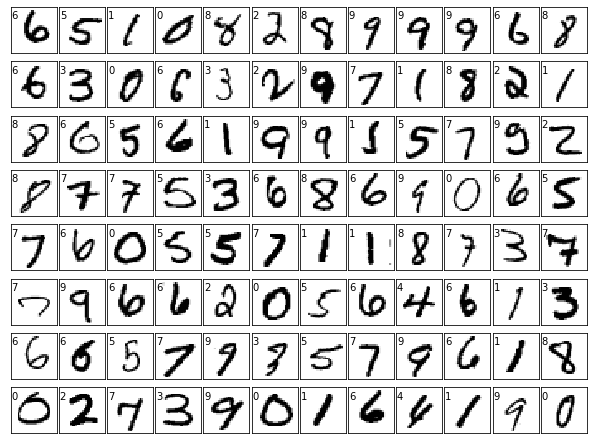

In [42]:
display_digits(np_data.values, np_target)

### Model Selection Process

![fig_skl](https://miro.medium.com/max/1400/1*LixatBxkewppAhv1Mm5H2w.jpeg)
Image Source: Christophe Bourguignat

- A Machine Learning algorithm needs to be trained on a set of data to learn the relationships between different features and how these features affect the target variable. 
- We need to divide the entire data set into two sets:
    + Training set on which we are going to train our algorithm to build a model. 
    + Testing set on which we will test our model to see how accurate its predictions are.
    
Before we create the two sets, we need to identify the algorithm we will use for our model.
We can use the `machine_learning_map` map (shown at the top of this page) as a cheat sheet to shortlist the algorithms that we can try out to build our prediction model. 

### Separating the Training and Testing Set

- The first 60000 (among the 70000) images are used for training.
- The remaining 10000 images are used for validations

In [43]:
num_train = 60000

X_train = np_data.values[:num_train]
X_test  = np_data.values[num_train:]
y_train = np_target[:num_train]
y_test  = np_target[num_train:]

In [44]:
print(f' Train Data:  {X_train.shape}')
print(f' Test Data:   {X_test.shape}')
print(f' Train label: {y_train.shape}')
print(f' Test Label:  {y_test.shape}')

 Train Data:  (60000, 784)
 Test Data:   (10000, 784)
 Train label: (60000,)
 Test Label:  (10000,)


**Shuffle the training set:**

In [45]:
nn = X_train.shape[0]
shuffle_index = np.random.permutation(nn)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

###  Training a Binary Classifier

- Binary classification means there are two classes to work with that relate to one another as `true` and `false`.
- Here, we want to identify a single digit: looking at `9`s.
- The classification will tell us if we have a `9` (true) or not (false).

**Set the target arrays as boolean arrays:** true if 9 otherwise false.

In [ ]:
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)

**Create and train the model:**

- We use the SGDClassifier that applies regularized linear model with SGD (Stochastic Gradient Descent) learning to build an estimator.
- The method helps building an estimator for classification and regression problems.

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf =SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_9)

**Make an initial prediction:**

In [ ]:
some_index = 15657
some_digit = np_data.values[some_index]
print(np_target[some_index])

In [ ]:
some_digit_predict = sgd_clf.predict([some_digit])

In [ ]:
some_digit_predict

**Measuring accuracy using cross validation**

- The `stratifiedKfold` class performs stratified sampling to produce folds that contain a representative ratio of each class. 
- At each iteration the code creates a clone of the classifier, trains that clone on the training fold and then makes predictions on the test fold. 
- It then counts the number of correct predictions and outputs the ratio of correct predictions.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
n_splits = 3
skfolds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

kfold_scores = list()
idx = 0
for train_index, test_index in skfolds.split(X_train, y_train_9):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_9[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_9[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    scr = n_correct/len(y_pred)
    kfold_scores.append(scr)
    print(f"Test: {idx} -- Score: {scr}")
    idx += 1

In [ ]:
print(f"{n_splits}-fold average score: {np.mean(np.array(kfold_scores))}")

In [ ]:
from sklearn.model_selection import cross_val_score

validation = cross_val_score(sgd_clf, X_train, y_train_9, 
                             cv=3, 
                             scoring='accuracy', 
                             verbose=1)

print(validation)

The sklearn cross_val_score in action returning the same result.

In [ ]:
accuracy = (sum(np_target==9)/len(np_target))*100
print(f'{np.max(validation)*100}% accuracy might not as impressive as it sounds \n where there are {accuracy :.2f}% of 9s in the dataset')

**Confusion matrix**

- A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier. 
- It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score.
- The confusion matrix is a much better way to evaluate the performance of a classifier, especially when there is a skewed dataset as we have here with only 10% of the dataset being the target.
- Each row represents a class, each column a prediction:
   * The first row is negative cases (non-9s) with the top left containing all the correctly classified non-9s (True Negatives), the top right the 9s incorrectly classified as non-9s (False-Positves).
   * The second row represents the positive class, 9s in this case, bottom left contains the 9s incorrectly classified as non-9s (False Negatives), the bottom right containing the correctly classified 9s (True Positives)
   
| | Actual | |
| --- |: --- |: --- |
| **Prediction** | True Positive | False Positive |
| | False Negative | True Negative |

We first need a set of predictions to compare to the actual targets:

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3)

In [ ]:
cf_matrix = metrics.confusion_matrix(y_train_9, y_train_pred)

print(f"Confusion Matrix: \n{cf_matrix}")
print(f"\n Number of images: {np.sum(cf_matrix)}")

We can visualize the confusion matrix:

In [ ]:
cm = metrics.confusion_matrix(y_train_9, y_train_pred, 
                              labels=sgd_clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                      display_labels=sgd_clf.classes_)
disp.plot() 

#### Precision/Recall
- Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced.
- Precision measures the number of true positives (correctly classified 9s) as a ratio of the total samples classified as a 9: $\frac{T_P}{T_P + F_P}$
- Recall measures the number of true positives as a ratio of the total number of positives: $\frac{T_P}{T_P + F_N}$.
- The precision-recall curve shows the tradeoff between precision and recall for different threshold. 
  - A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. 
  - A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. 
  - An ideal system with high precision and high recall will return many results, with all results labeled correctly.

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3, method='decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(12,8))
    plt.title('Precision and recall vs decision threshold')
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### <font color="red">Training and Prediction on the Entire Dataset</font>

- We will use the Stochastic Gradient Descent classifier (SGD). 
- Scikit-Learn’s SGDClassifier is a good starting point for linear classifiers. 
- Using the loss parameter we will see how Support Vector Machine (Linear SVM) and Logistic Regression perform for the same dataset.


#### Using Linear Support Vector Machine (SVM)
- We use linear SVM with stochastic gradient descent (SGD) learning.
- The gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule.
- To use the Linear SVM Classifier, we need to set the loss parameter to `hinge`. 

In [ ]:
from sklearn.linear_model import SGDClassifier
 
sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train, y_train)

- Before testing the model, it is a good practice to first see the cross-validation scores on the training data. 
- That you will give you a very good projection of how the model performs.

In [ ]:
valid = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

In [ ]:
min_val = np.min(valid)*100
max_val = np.max(valid)*100
print(f'For three-fold Cross-Validation you are getting around: {min_val}%-{max_val}%')

We can now compute the actual test scores:

In [ ]:
scoreSVM = sgd_clf.score(X_test, y_test)
print("Test score of the Linear SVM: ", scoreSVM)

In [ ]:
y_predict = sgd_clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_predict, 
                              labels=sgd_clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                      display_labels=sgd_clf.classes_)
disp.plot()

### Using Logistic Regression

In [ ]:
sgd_clf = SGDClassifier(loss='log', random_state=42)
sgd_clf.fit(X_train, y_train)

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

In [ ]:
scoreLR = sgd_clf.score(X_test, y_test)
print("Test score of the Logistic Regression: ", scoreLR)

In [ ]:
y_predict = sgd_clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_predict, 
                              labels=sgd_clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                      display_labels=sgd_clf.classes_)
disp.plot();

### Random Forest Classifier

- Random forests is a supervised learning algorithm. 
- A forest is comprised of trees. 
- It is said that the more trees it has, the more robust a forest is. 
- Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. 
- It also provides a pretty good indicator of the feature importance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 500)
forest = forest.fit(X_train, y_train)

In [ ]:
forest_output = forest.predict(X_test)

Calculate accuracy on the prediction:

In [ ]:
print("Random Forest with n_estimators:500")
print(accuracy_score(y_test, forest_output))

Display few true images against predictions:

In [ ]:
display_digits(X_test, forest_output)

In [ ]:
cm = metrics.confusion_matrix(y_test, forest_output, 
                              labels=forest.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                      display_labels=forest.classes_)
disp.plot()

### Gradient Boosting Classifier



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, 
                                 max_depth=1, random_state=0).fit(X_train,y_train)

In [ ]:
gbc_output = clf.predict(X_test) 

Calculate accuracy on the prediction:

In [ ]:
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gbc_output)}")

Display few true images against predictions:

In [ ]:
display_digits(X_test, gbc_output)

In [ ]:
cm = metrics.confusion_matrix(y_test, gbc_output, 
                              labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                      display_labels=clf.classes_)
disp.plot()

### MLP Classifier

- The Multi-layer Perceptron classifier relies on an underlying Neural Network to perform the task of classification.

In [ ]:
from sklearn.neural_network import MLPClassifier

#### With the Stochastic Gradient Descent (`sgd`) Solver

In [ ]:
clf = MLPClassifier(solver='sgd', hidden_layer_sizes=(10,), 
                    random_state=1)
clf.fit(X_train, y_train)   
neural_output = clf.predict(X_test)

Calculate accuracy on the prediction:

In [ ]:
print(f"MLP sgd Accuracy: {accuracy_score(y_test, neural_output)}")

Display few true images against predictions:

In [ ]:
display_digits(X_test, neural_output)

In [ ]:
cm = metrics.confusion_matrix(y_test, neural_output, 
                              labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                      display_labels=clf.classes_)
disp.plot()

#### With the Quasi-Newton (`lbfgs`) Solver

In [ ]:
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,), 
                    random_state=1)
clf.fit(X_train, y_train)   
neural_output = clf.predict(X_test)

Calculate accuracy on the prediction:

In [ ]:
print(f"MLP lbfgs Accuracy: {accuracy_score(y_test, neural_output)}")

Display few true images against predictions:

In [ ]:
display_digits(X_test, neural_output)

In [ ]:
cm = metrics.confusion_matrix(y_test, neural_output, 
                              labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                      display_labels=clf.classes_)
disp.plot()